<h1>Sales and ESRB Ratings Data Analysis</h1>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games_df = pd.read_csv('../data/normalized_games_data.csv')

In [35]:
games_df.head(10)

,rank,game,platform,publisher,developer,vgchartz_score,total_shipped,total_sales,north_america_sales,pal_sales,japan_sales,other_sales,release_date,genre,metacritic_count,metacritic_score,metacritic_user_count,metacritic_user_score,esrb_rating,esrb_rating_full
0,8,Minecraft,All,Mojang,Mojang AB,NaN,238.00,NaN,NaN,NaN,NaN,NaN,2011-11-18,Misc,NaN,NaN,NaN,NaN,NaN,NaN
1,12,Grand Theft Auto V,All,Rockstar Games,Rockstar North,NaN,180.00,NaN,NaN,NaN,NaN,NaN,2013-09-17,Action,50.0,97.0,3994.0,82.0,M,Mature
2,27,Wii Sports,Wii,Nintendo,Nintendo EAD,NaN,82.90,NaN,NaN,NaN,NaN,NaN,2006-11-19,Sports,51.0,76.0,322.0,80.0,E,Everyone
3,40,PlayerUnknown's Battlegrounds,All,PUBG Corporation,PUBG Corporation,NaN,70.00,NaN,NaN,NaN,NaN,NaN,2017-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,NaN,53.79,NaN,NaN,NaN,NaN,NaN,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,55,Red Dead Redemption 2,All,Rockstar Games,Rockstar Studios,NaN,53.00,NaN,NaN,NaN,NaN,NaN,2018-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,61,The Witcher 3: Wild Hunt,All,Warner Bros. Interactive Entertainment,CD Projekt Red Studio,NaN,50.00,NaN,NaN,NaN,NaN,NaN,2015-05-18,Role-Playing,79.0,92.0,10179.0,92.0,M,Mature
7,66,Terraria,All,Re-Logic,Re-Logic,NaN,44.50,NaN,NaN,NaN,NaN,NaN,2011-05-16,Action,39.0,81.0,139.0,72.0,T,Teen
8,72,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,8.0,42.21,NaN,NaN,NaN,NaN,NaN,2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,76,Super Mario Bros.,NES,Nintendo,Nintendo EAD,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985-10-18,Platform,NaN,NaN,NaN,NaN,NaN,NaN


<h2>1. Is there a relationship between ESRB ratings and sales? Does one outsell the other?</h2>

The number of games we are analyzing for this question: 4357


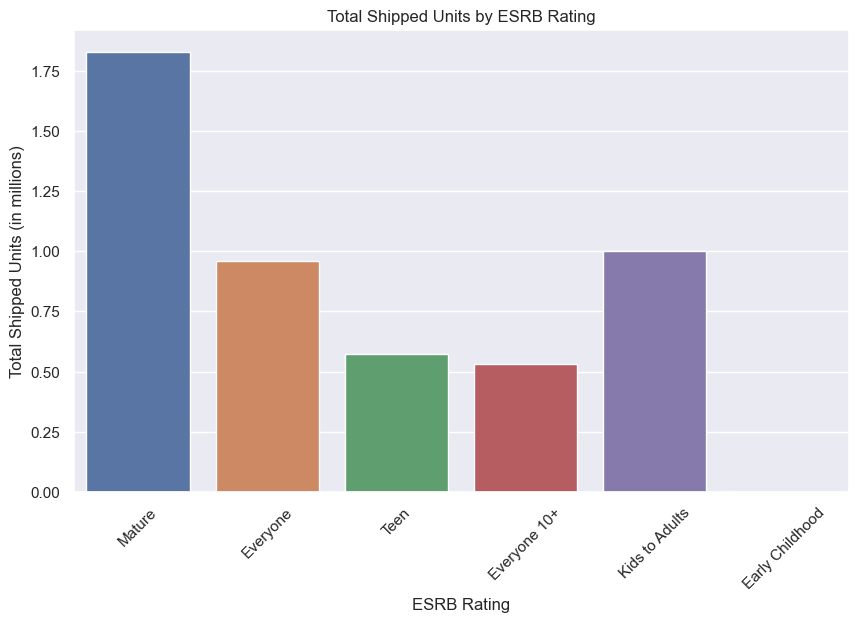

In [36]:
sales_esrb_rating_full_df = games_df[['esrb_rating_full', 'total_shipped']]

# Drop rows with NaN values
sales_esrb_rating_full_df = sales_esrb_rating_full_df.dropna()

game_sales = np.array(sales_esrb_rating_full_df['total_shipped'].astype(int))
game_esrb_rating_full = np.array(sales_esrb_rating_full_df['esrb_rating_full'])

print(f'The number of games we are analyzing for this question: {len(game_sales)}')

plt.figure(figsize=(10, 6))
sns.barplot(x=game_esrb_rating_full, y=game_sales, errorbar=None)
plt.title('Total Shipped Units by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.xticks(rotation=45)
plt.ylabel('Total Shipped Units (in millions)')
plt.show()

<h3>2. How many games are there by genre?</h3>

In [38]:
mature_games_df = games_df[games_df['esrb_rating'] == 'M']
adult_only_games_df = games_df[games_df['esrb_rating'] == 'AO']
everyone_games_df = games_df[games_df['esrb_rating'] == 'E']
everyone_10_games_df = games_df[games_df['esrb_rating'] == 'E10+']
teen_games_df = games_df[games_df['esrb_rating'] == 'T']
kids_to_adults_games_df = games_df[games_df['esrb_rating'] == 'K-A']
early_childhood_games_df = games_df[games_df['esrb_rating'] == 'EC']

print(f'The number of mature games: {len(mature_games_df)}')
print(f'The number of adult only games: {len(adult_only_games_df)}')
print(f'The number of everyone games: {len(everyone_games_df)}')
print(f'The number of everyone 10+ games: {len(everyone_10_games_df)}')
print(f'The number of teen games: {len(teen_games_df)}')
print(f'The number of kids to adults games: {len(kids_to_adults_games_df)}')
print(f'The number of early childhood games: {len(early_childhood_games_df)}')

The number of mature games: 813
The number of adult only games: 0
The number of everyone games: 1420
The number of everyone 10+ games: 516
The number of teen games: 1604
The number of kids to adults games: 3
The number of early childhood games: 1


<h4>It appears that Mature and Adults Only games way outsell the other ratings. This is likely due to the fact that the majority of games are rated Mature or that the average video game player's age has increased over time.</h4>